# ТМ для новостей

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys
# sys.path.append('/Users/velo1/SynologyDrive/GIT_syno/Mac/Netology')
from beholder import print_methods
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# ! wget https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.1/lenta-ru-news.csv.bz2
# df = pd.read_csv('lenta-ru-news.csv.bz2')

In [3]:
df = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/NLP/lenta-ru-news.csv.bz2')

In [4]:
df

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18
...,...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,ТВ и радио,2019/12/14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,Все,2019/12/14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,Политика,2019/12/14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,Общество,2019/12/14


In [5]:
df = df[df.tags.isin(['Общество', 'Футбол', 'Соцсети', 'Музыка', 'Кино'])][['tags', 'text']].sample(1000)
df.sort_values(by = ['tags'], inplace = True)
df.head()

,tags,text
727092,Кино,Видеоблогер Евгений Баженов (BadComedian) раск...
633220,Кино,Актер и режиссер Иван Охлобыстин заявил на сво...
627202,Кино,Режиссер фильма «Матильда» Алексей Учитель зая...
558104,Кино,Создатели сериала «Американская история ужасов...
639733,Кино,"Антон Богданов, сыгравший одного из главных ге..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 727092 to 501387
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    1000 non-null   object
 1   text    1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [7]:
df.tags.value_counts()

tags
Общество    521
Футбол      236
Кино        142
Музыка      101
Name: count, dtype: int64

### Препроцессинг

In [8]:
try:
    import pymorphy2 # library for morphological analysis designed by Yandex
except:
    ! pip install pymorphy2
    import pymorphy2

m = pymorphy2.MorphAnalyzer()   # create an instance of MorphAnalyzer

In [9]:
import re
from nltk.corpus import stopwords # Import the stop word list
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/velo1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
print_methods(nltk)

540 methods for None (<class 'module'>): 
 ['ARLSTem', 'ARLSTem2', 'AbstractLazySequence', 'AffixTagger', 'AlignedSent', 'Alignment', 'AnnotationTask', 'ApplicationExpression', 'Assignment', 'BigramAssocMeasures', 'BigramCollocationFinder', 'BigramTagger', 'BinaryMaxentFeatureEncoding', 'BlanklineTokenizer', 'BllipParser', 'BottomUpChartParser', 'BottomUpLeftCornerChartParser', 'BottomUpProbabilisticChartParser', 'Boxer', 'BrillTagger', 'BrillTaggerTrainer', 'CFG', 'CRFTagger', 'CfgReadingCommand', 'ChartParser', 'ChunkParserI', 'ChunkScore', 'Cistem', 'ClassifierBasedPOSTagger', 'ClassifierBasedTagger', 'ClassifierI', 'ConcordanceIndex', 'ConditionalExponentialClassifier', 'ConditionalFreqDist', 'ConditionalProbDist', 'ConditionalProbDistI', 'ConfusionMatrix', 'ContextIndex', 'ContextTagger', 'ContingencyMeasures', 'CoreNLPDependencyParser', 'CoreNLPParser', 'Counter', 'CrossValidationProbDist', 'DRS', 'DecisionTreeClassifier', 'DefaultTagger', 'DependencyEvaluator', 'DependencyGramma

In [11]:
from tqdm.auto import tqdm  # library for progress bar
tqdm.pandas()               # method for progress bar in pandas

### Preprocessing

In [12]:
print("который" in stopwords.words("russian"))
# enriching the list of stopwords
mystopwords = stopwords.words("russian") + [
    "это",
    "наш",
    "тыс",
    "млн",
    "млрд",
    "также",
    "т",
    "д",
    "который",
    "прошлый",
    "сей",
    "свой",
    "наш",
    "мочь",
    "такой",
]
ru_words_pattern = re.compile("[А-Яа-я]+")


def words_only(text):
    """a function for removing all the non-word characters"""
    return " ".join(ru_words_pattern.findall(text))


def lemmatize(text):
    try:
        # return normal_form of each word in lowercased text
        return " ".join([m.parse(word)[0].normal_form for word in text.lower().split()])
    except:
        return " "


def remove_stopwords(text, mystopwords=mystopwords):
    
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""


def preprocess(text):
    return remove_stopwords(lemmatize(words_only(text.lower())))

False


In [13]:
print_methods(df.text.astype('str'))

205 methods for None (<class 'pandas.core.series.Series'>): 
 ['T', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'apply', 'argmax', 'argmin', 'argsort', 'array', 'asfreq', 'asof', 'astype', 'at', 'at_time', 'attrs', 'autocorr', 'axes', 'backfill', 'between', 'between_time', 'bfill', 'bool', 'clip', 'combine', 'combine_first', 'compare', 'convert_dtypes', 'copy', 'corr', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'div', 'divide', 'divmod', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtype', 'dtypes', 'duplicated', 'empty', 'eq', 'equals', 'ewm', 'expanding', 'explode', 'factorize', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'flags', 'floordiv', 'ge', 'get', 'groupby', 'gt', 'hasnans', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'infer_objects', 'info', 'interpolate', 'is_monotonic_decreasing', 'is_monotonic_increasing', 'is_unique', 'isin', 'isna', 'isnull', 'item', 'i

In [14]:
# lowercasing -> extract only ru_words -> lemmatization -> stopwords
df.text = df.text.astype('str').progress_map(preprocess)

100%|██████████| 1000/1000 [00:18<00:00, 53.31it/s]


In [15]:
print_methods(df)

211 methods for None (<class 'pandas.core.frame.DataFrame'>): 
 ['T', 'abs', 'add', 'add_prefix', 'add_suffix', 'agg', 'aggregate', 'align', 'all', 'any', 'apply', 'applymap', 'asfreq', 'asof', 'assign', 'astype', 'at', 'at_time', 'attrs', 'axes', 'backfill', 'between_time', 'bfill', 'bool', 'boxplot', 'clip', 'columns', 'combine', 'combine_first', 'compare', 'convert_dtypes', 'copy', 'corr', 'corrwith', 'count', 'cov', 'cummax', 'cummin', 'cumprod', 'cumsum', 'describe', 'diff', 'div', 'divide', 'dot', 'drop', 'drop_duplicates', 'droplevel', 'dropna', 'dtypes', 'duplicated', 'empty', 'eq', 'equals', 'eval', 'ewm', 'expanding', 'explode', 'ffill', 'fillna', 'filter', 'first', 'first_valid_index', 'flags', 'floordiv', 'from_dict', 'from_records', 'ge', 'get', 'groupby', 'gt', 'head', 'hist', 'iat', 'idxmax', 'idxmin', 'iloc', 'index', 'infer_objects', 'info', 'insert', 'interpolate', 'isetitem', 'isin', 'isna', 'isnull', 'items', 'iterrows', 'itertuples', 'join', 'keys', 'kurt', 'kurtos

In [16]:
df

,tags,text
727092,Кино,видеоблогер евгений баженов раскритиковать фил...
633220,Кино,актёр режиссёр иван охлобыстина заявить страни...
627202,Кино,режиссёр фильм матильда алексей учитель заявит...
558104,Кино,создатель сериал американский история ужас опу...
639733,Кино,антон богданов сыграть главный герой сериал ре...
...,...,...
735666,Футбол,футболист зенит александр кокорин заболеть сиз...
681147,Футбол,контрольный дисциплинарный комитет российский ...
647919,Футбол,бывший тренер сборный россия футбол александр ...
569867,Футбол,футболист барселона счёт разгромить реал матч ...


## Генсим

### TfidfModel

In [17]:
# ! python -m pip install gensim

In [18]:
from gensim.corpora import Dictionary   # for creating dictionary
from gensim.models import TfidfModel    # for creating tf-idf model
from gensim import similarities         # for creating similarity matrix

In [19]:
texts = [text.split() for text in df.text] # list of lists of tokens by rows
print(f'Length of texts: {len(texts)}')
print(f'First two lists: {texts[:2]}')  

Length of texts: 1000
First two lists: [['видеоблогер', 'евгений', 'баженов', 'раскритиковать', 'фильм', 'константин', 'хабенский', 'собибора', 'выдвинуть', 'премия', 'оскар', 'россия', 'категория', 'хороший', 'фильм', 'иностранный', 'язык', 'рассказать', 'интервью', 'телеканал', 'дождь', 'описать', 'собибора', 'отвратительный', 'бездарный', 'кино', 'неплохо', 'снятой', 'визуальный', 'сторона', 'отметить', 'выбрать', 'тема', 'раскрытый', 'странный', 'дикий', 'способ', 'мотивация', 'герой', 'понятный', 'баженов', 'назвать', 'фильм', 'мнение', 'достойный', 'претендовать', 'премия', 'американский', 'киноакадемия', 'голова', 'сразу', 'приходить', 'аритмия', 'борис', 'хлебников', 'несмотря', 'весь', 'проблема', 'аритмия', 'выглядеть', 'искренний', 'настоящее', 'фильм', 'отличие', 'картонный', 'бездарный', 'именно', 'сценарный', 'план', 'фильм', 'собибора', 'заявить', 'идея', 'фильм', 'принадлежать', 'министр', 'культура', 'владимир', 'мединский', 'якобы', 'настоять', 'выдвижение', 'лента', 

In [20]:
dictionary = Dictionary(texts)  # create dictionary of words in texts
print_methods(dictionary)
dictionary.most_common(10)

32 methods for None (<class 'gensim.corpora.dictionary.Dictionary'>): 
 ['add_documents', 'add_lifecycle_event', 'cfs', 'compactify', 'dfs', 'doc2bow', 'doc2idx', 'filter_extremes', 'filter_n_most_frequent', 'filter_tokens', 'from_corpus', 'from_documents', 'get', 'id2token', 'items', 'iteritems', 'iterkeys', 'itervalues', 'keys', 'lifecycle_events', 'load', 'load_from_text', 'merge_with', 'most_common', 'num_docs', 'num_nnz', 'num_pos', 'patch_with_special_tokens', 'save', 'save_as_text', 'token2id', 'values']


[('год', 1647),
 ('россия', 637),
 ('человек', 517),
 ('сообщать', 478),
 ('стать', 423),
 ('время', 416),
 ('весь', 413),
 ('заявить', 377),
 ('российский', 366),
 ('слово', 355)]

In [21]:
corpus_bow = [dictionary.doc2bow(text) for text in texts]   # create corpus (list) of words in texts
print(corpus_bow)

[[(0, 1), (1, 2), (2, 4), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 5), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 8), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1)], [(5, 1), (16, 1), (24, 1), (25, 1), (43, 1), (46, 1), (77, 1), (78, 1), (93, 1), (97, 1), (98, 1), (100, 1)

In [22]:
# поизучаем, что здесь происходит
# corpus

Косинусная близость:


$$similarity=\cos(\theta )={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}}$$

Вычисление сходства по косинусной мере на векторах $tf-idf$:

# TF-IDF Computation

TF-IDF (Term Frequency-Inverse Document Frequency) is a method for measuring the importance of terms in a document within a corpus. It combines a local component (term frequency) with a global component (inverse document frequency), and normalizes the resulting documents to unit length.

The formula for the non-normalized weight of term  *\(i\)*  in document *\(j\)* in a corpus of *\(D\)* documents is as follows:

$$\text{weight}_{i,j} = \text{frequency}_{i,j} \times \log_2 \frac{D}{\text{document\_freq}_{i}}$$

or, more generally:

$$
\text{weight}_{i,j} = \text{wlocal}(\text{frequency}_{i,j}) \times \text{wglobal}(\text{document\_freq}_{i}, D)
$$

This allows you to incorporate your own custom *\(wlocal\)* and *\(wglobal\)* functions for specialized applications.


In [23]:
tfidf = TfidfModel(corpus_bow)      # initialize a tf-idf model
print_methods(tfidf)
corpus_tfidf = tfidf[corpus_bow]    # retrieve the tf-idf scores for a whole corpus 
                                    # (each document is represented by its TF-IDF weights)
# tfidf.lifecycle_events              # check the model's state  

19 methods for None (<class 'gensim.models.tfidfmodel.TfidfModel'>): 
 ['add_lifecycle_event', 'cfs', 'dfs', 'eps', 'id2word', 'idfs', 'initialize', 'lifecycle_events', 'load', 'normalize', 'num_docs', 'num_nnz', 'pivot', 'save', 'slope', 'smartirs', 'term_lengths', 'wglobal', 'wlocal']


In [24]:
# %%time
# Compute cosine similarity against a corpus of documents by storing the index matrix in memory.
index = similarities.MatrixSimilarity(corpus_tfidf) # create a similarity index
print_methods(index)
sims = index[corpus_tfidf]                          # get similarity matrix

9 methods for None (<class 'gensim.similarities.docsim.MatrixSimilarity'>): 
 ['add_lifecycle_event', 'chunksize', 'get_similarities', 'index', 'load', 'normalize', 'num_best', 'num_features', 'save']


In [25]:
sims.shape # it's a square matrix, where each row is a document and each column is a topic

(1000, 1000)

In [26]:
print_methods(sims)

71 methods for None (<class 'numpy.ndarray'>): 
 ['T', 'all', 'any', 'argmax', 'argmin', 'argpartition', 'argsort', 'astype', 'base', 'byteswap', 'choose', 'clip', 'compress', 'conj', 'conjugate', 'copy', 'ctypes', 'cumprod', 'cumsum', 'data', 'diagonal', 'dot', 'dtype', 'dump', 'dumps', 'fill', 'flags', 'flat', 'flatten', 'getfield', 'imag', 'item', 'itemset', 'itemsize', 'max', 'mean', 'min', 'nbytes', 'ndim', 'newbyteorder', 'nonzero', 'partition', 'prod', 'ptp', 'put', 'ravel', 'real', 'repeat', 'reshape', 'resize', 'round', 'searchsorted', 'setfield', 'setflags', 'shape', 'size', 'sort', 'squeeze', 'std', 'strides', 'sum', 'swapaxes', 'take', 'tobytes', 'tofile', 'tolist', 'tostring', 'trace', 'transpose', 'var', 'view']


In [27]:
sims[0] # first document similarity vector

array([9.99999881e-01, 2.11233646e-02, 6.63763434e-02, 1.57224331e-02,
       1.99030619e-02, 4.07903194e-02, 2.31915736e-03, 2.31656432e-02,
       7.34704062e-02, 2.73481198e-02, 2.43288353e-02, 9.45512950e-03,
       3.54264528e-02, 8.79506916e-02, 3.00905388e-02, 1.53358234e-03,
       1.13480529e-02, 4.03323695e-02, 1.27147632e-02, 4.36657406e-02,
       6.65004598e-03, 1.19793359e-02, 3.16655338e-02, 2.56945193e-02,
       1.71990633e-01, 1.67770181e-02, 3.37065794e-02, 1.56611539e-02,
       1.40386226e-03, 3.53234746e-02, 2.71010268e-02, 2.02023890e-02,
       1.24060214e-02, 4.67803553e-02, 1.51817175e-02, 2.09105741e-02,
       6.82880133e-02, 4.52986313e-03, 1.31762475e-02, 2.68603629e-03,
       5.57034276e-02, 3.68577726e-02, 1.65506508e-02, 3.46649438e-02,
       6.50725234e-03, 4.55817357e-02, 3.17435265e-02, 1.35415001e-02,
       3.16294171e-02, 2.48171948e-02, 3.86490673e-02, 7.20539838e-02,
       4.51337770e-02, 2.06882805e-02, 2.77145840e-02, 1.30869681e-02,
      

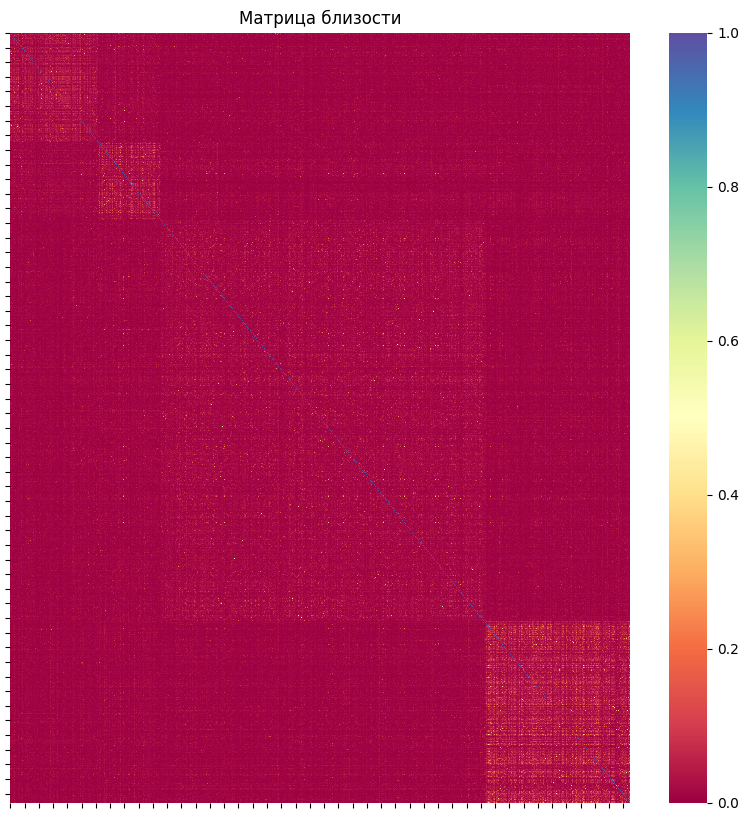

In [28]:
import seaborn as sns

plt.figure(figsize = (10,10))
# sims  = (sims + 1)/2.
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])
plt.title("Матрица близости")
plt.show()

### Латентно-семантический анализ (LSA, LSI)


Сингулярное разложение: $M'_k = U \Sigma_k V^t_k$

* $M$ – матрица слово-документ
* $U$ – матрица документ-тема
* $k$ – число тем
* $V$ - матрица слово-тема

In [29]:
from gensim.models import lsimodel # Latent Semantic Indexing for dimensionality reduction

In [30]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5)

CPU times: user 1.41 s, sys: 487 ms, total: 1.9 s
Wall time: 409 ms


In [31]:
print_methods(lsi)
lsi.num_terms, lsi.num_topics

25 methods for None (<class 'gensim.models.lsimodel.LsiModel'>): 
 ['add_documents', 'add_lifecycle_event', 'chunksize', 'decay', 'dispatcher', 'docs_processed', 'dtype', 'extra_samples', 'get_topics', 'id2word', 'lifecycle_events', 'load', 'num_terms', 'num_topics', 'numworkers', 'onepass', 'power_iters', 'print_debug', 'print_topic', 'print_topics', 'projection', 'random_seed', 'save', 'show_topic', 'show_topics']


(15834, 5)

In [32]:
lsi.show_topic(0, topn=10)  # top 10 words for topic 0

[('матч', -0.15772470981325828),
 ('клуб', -0.1134628049258362),
 ('команда', -0.10756446797747461),
 ('россия', -0.10720257336624756),
 ('чемпионат', -0.10536685704952792),
 ('счёт', -0.09526140249613174),
 ('процент', -0.0940956356029457),
 ('сборный', -0.09099971833346715),
 ('год', -0.08818414452773965),
 ('футболист', -0.08767539656410543)]

In [36]:
lsi.show_topics(5, formatted=False) # 5 topics with 10 words each

[(0,
  [('матч', -0.15772470981325828),
   ('клуб', -0.1134628049258362),
   ('команда', -0.10756446797747461),
   ('россия', -0.10720257336624756),
   ('чемпионат', -0.10536685704952792),
   ('счёт', -0.09526140249613174),
   ('процент', -0.0940956356029457),
   ('сборный', -0.09099971833346715),
   ('год', -0.08818414452773965),
   ('футболист', -0.08767539656410543)]),
 (1,
  [('матч', -0.24189356278186455),
   ('счёт', -0.15468524206402878),
   ('й', -0.15437445801765598),
   ('чемпионат', -0.14939895723725402),
   ('клуб', -0.14304134972675772),
   ('минута', -0.14006534868270132),
   ('команда', -0.13676831196680406),
   ('лига', -0.12985296027923923),
   ('зенит', -0.12188886308012607),
   ('тур', -0.11566286516204659)]),
 (2,
  [('фильм', -0.31042740150347925),
   ('картина', -0.18887670811415075),
   ('режиссёр', -0.14690334373732344),
   ('альбом', -0.14434224255753889),
   ('роль', -0.13643000293373794),
   ('группа', -0.1228365948627614),
   ('актёр', -0.12258732322746776),

Как снижение размерности влияет на матрицу близости:

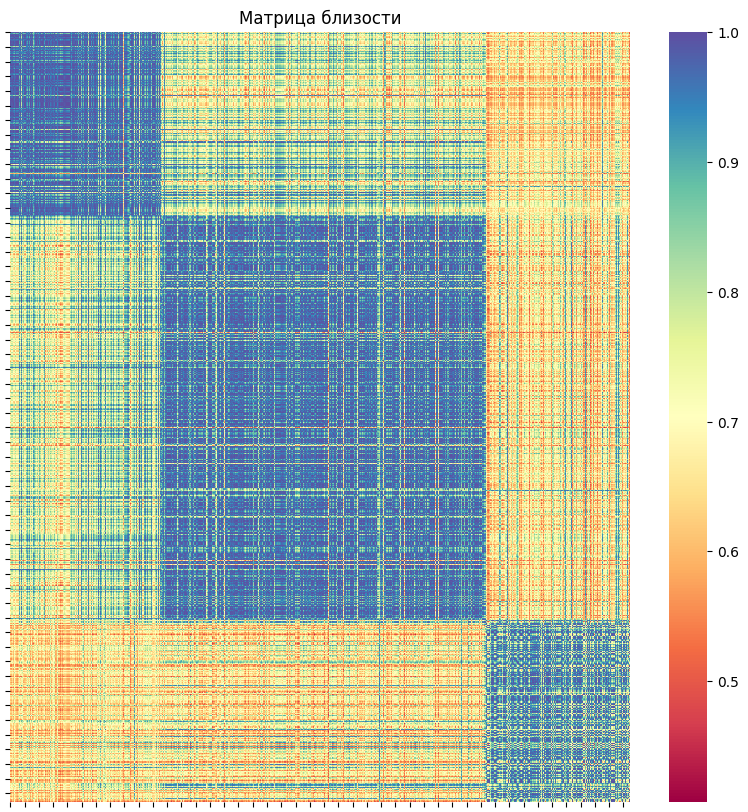

In [38]:
corpus_lsi = lsi[corpus_bow]    # applies Latent Semantic Indexing (LSI) to the corpus using a previously trained LSI model (lsi). 
# It transforms the documents in the corpus into the LSI space.
indexLSI = similarities.MatrixSimilarity(corpus_lsi)  # creates a similarity index using the corpus_lsi data. 
# The MatrixSimilarity index calculates cosine similarity between pairs of documents based on their vector representations in the LSI space.
simsLSI = indexLSI[corpus_lsi]    # computes similarity scores for each document in the corpus_lsi against all other documents in the corpus_lsi. 
# The result is a similarity matrix where each row corresponds to a document and each column corresponds to the similarity score of that document with other documents.
simsLSI  = (simsLSI + 1)/2.       # performs a transformation on the similarity scores. Adding 1 and then dividing by 2 scales the similarity scores
# from the range of [-1, 1] (cosine similarity) to the range of [0, 1], which is a more intuitive range for similarity scores.
plt.figure(figsize = (10,10))
sns.heatmap(data=simsLSI, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

### Главные компоненты

In [39]:
X = [0] * len(df)   # Initialize two lists X and Y to store the LSI topic weights for each document. These lists are initially filled with zeros.
Y = [0] * len(df)
for i in range(len(df)):
    vec = corpus_bow[i] # Get the vector representation (vec) of the current document from the corpus
    LSI_topics = (lsi[vec]) # Apply the LSI model to the vector representation of the current document
    for topic in LSI_topics:
        if topic[0] == 0:   # If the topic index is 0, assign the weight to the corresponding index in the X list
            X[i] = topic[1]
        elif topic[0] == 1: # If the topic index is 1, assign the weight to the corresponding index in the Y list
            Y[i] = topic[1]

vis_df = pd.DataFrame({'X': X, 'Y': Y, 'topic' : df.tags})
# to plot the LSI topic weights of documents in a two-dimensional space defined by the 'X' and 'Y' coordinates.

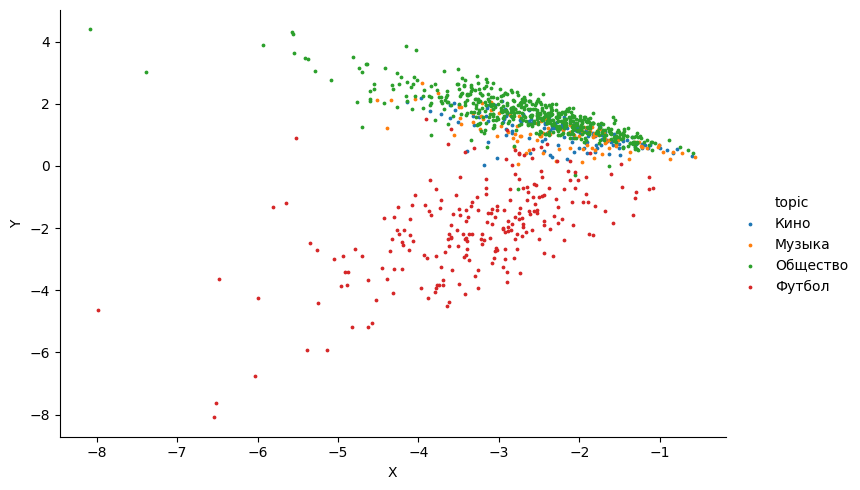

In [40]:
sns.FacetGrid(vis_df, hue="topic", height=5, aspect=1.5).map(plt.scatter, "X", "Y", s=3).add_legend();

### Truncated SVD и TSNE

#### t-SNE
t-SNE (t-distributed Stochastic Neighbor Embedding) — техника нелинейного снижения размерности и визуализации многомерных переменных. Она разработана специально для данных высокой размерности Л. ван дер Маатеном и Д. Хинтоном. t-SNE — это итеративный алгоритм, основанный на вычислении попарных расстояний между всеми объектами (в том числе поэтому он довольно медленный).

In [41]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vectors = TfidfVectorizer().fit_transform(df.text) # строим тф-идф матрицу документ-слово
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors) # оставляем n главных компонент

In [43]:
X_reduced

array([[ 0.12093022, -0.06304493,  0.19856914, -0.01412591,  0.06870866],
       [ 0.17193614, -0.07835298,  0.06618341,  0.05267391, -0.04347174],
       [ 0.15368428, -0.10259618,  0.18068853, -0.04361835,  0.08516738],
       ...,
       [ 0.21150224,  0.1578716 ,  0.01318263,  0.09014413, -0.21673708],
       [ 0.22632859,  0.27352582, -0.00819543, -0.05667195,  0.11684993],
       [ 0.27469362,  0.40538132, -0.06869058, -0.11651629,  0.29044448]])

In [44]:
# %%time
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced) # строим мэппинг в двухмерную плоскость с TSNE

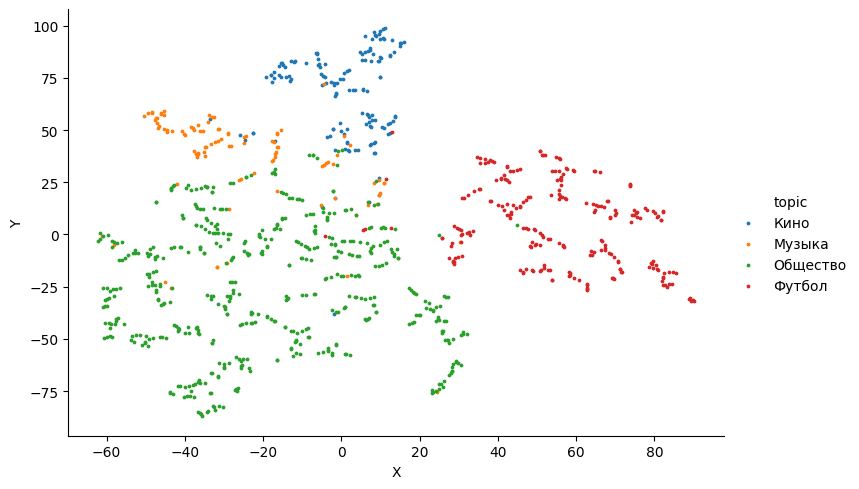

In [45]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.tags})
sns.FacetGrid(vis_df, hue="topic", height=5, aspect=1.5).map(plt.scatter, "X", "Y", s=3).add_legend();

Advanced: [bigARTM](https://bigartm.readthedocs.io/en/stable/tutorials/python_tutorial.html)

### Задание: классификация

#### Данные

Скачиваются по [ссылке](https://drive.google.com/open?id=1gJEpwM3zdV5xe9nRU0VwQmGTiOTQdp10). Это отзывы пользователей на фильмы с КиноПоиска.

In [49]:
df2 = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/NLP/kinopoisk_reviews.csv')

In [50]:
df2.head()

,label,text
0,1,Эпиграф Добро которое ты делаешь от сердца ты ...
1,1,Теперь это один из моих любимых фильмов в жанр...
2,1,Что скрыто в фильме Лучше не бывает Одна шикар...
3,1,Перед нами очень милое и доброе кино которое л...
4,1,Завязка Мелвин Удал популярный писатель Нет не...


#### Задание

С помощью TruncatedSVD постройте векторное представление текстов в датасете.
Обучите на этих представлениях любой классификатор. Попробуйте разное количество компонент в интерванле от 30 до 300. Какое стработало лучше?

In [51]:
%time
df2.text = df2.text.astype('str').progress_map(preprocess)

100%|██████████| 46501/46501 [36:07<00:00, 21.46it/s] 


In [52]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your DataFrame
data = pd.read_csv('/Users/velo1/SynologyDrive/GIT_syno/data/NLP/kinopoisk_reviews.csv')  

# preprocess function
data.text = data.text.astype('str').progress_map(preprocess)

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
train_tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['text'])
test_tfidf_matrix = tfidf_vectorizer.transform(test_data['text'])

# Define a list of components to try
# components_list = list(range(30, 301, 60))
components_list = np.logspace(np.log10(30), np.log10(300), 5).astype(int)   

# Iterate over different numbers of components
for n_components in components_list:
    # Apply TruncatedSVD
    svd = TruncatedSVD(n_components=n_components)
    train_svd_matrix = svd.fit_transform(train_tfidf_matrix)
    test_svd_matrix = svd.transform(test_tfidf_matrix)
    
    # Train a classifier (SVM in this case)
    clf = SVC()
    clf.fit(train_svd_matrix, train_data['label'])
    
    # Make predictions
    predictions = clf.predict(test_svd_matrix)
    
    # Calculate and print accuracy
    accuracy = accuracy_score(test_data['label'], predictions)
    print(f'Number of components: {n_components}, Accuracy: {accuracy:.2f}')


Number of components: 30, Accuracy: 0.81
Number of components: 60, Accuracy: 0.81
Number of components: 90, Accuracy: 0.82
Number of components: 120, Accuracy: 0.82
Number of components: 150, Accuracy: 0.82
Number of components: 180, Accuracy: 0.82
Number of components: 210, Accuracy: 0.83
Number of components: 240, Accuracy: 0.83
Number of components: 270, Accuracy: 0.83
Number of components: 300, Accuracy: 0.83
